In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.DataFrame([[1,1,5,9],
                    [2,8,4,2],
                    [3,0,1,3],
                    [4,9,1,3],
                    [5,3,4,5]], index=['a','b','c','d','e'], columns=['A','B','C','D'])
df1

,A,B,C,D
a,1,1,5,9
b,2,8,4,2
c,3,0,1,3
d,4,9,1,3
e,5,3,4,5


In [3]:
# 用新增E欄位並賦值的方式新增column
df1['E'] = [2,1,4,5,1]
df1

,A,B,C,D,E
a,1,1,5,9,2
b,2,8,4,2,1
c,3,0,1,3,4
d,4,9,1,3,5
e,5,3,4,5,1


In [4]:
# 用insert() 新增欄位column資料，可以指定要加入的「位置」
df1.insert(2,column = 'F', value=[3,9,1,3,5])
df1

,A,B,F,C,D,E
a,1,1,3,5,9,2
b,2,8,9,4,2,1
c,3,0,1,1,3,4
d,4,9,3,1,3,5
e,5,3,5,4,5,1


In [5]:
# 用append() 新增rows資料
df1 = df1.append(pd.DataFrame([[6,1,4,5,1,7]],columns=['A','B','F','C','D','E']))
df1

C:\Users\sarbb\AppData\Local\Temp\ipykernel_26792\1100391498.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame([[6,1,4,5,1,7]],columns=['A','B','F','C','D','E']))


,A,B,F,C,D,E
a,1,1,3,5,9,2
b,2,8,9,4,2,1
c,3,0,1,1,3,4
d,4,9,3,1,3,5
e,5,3,5,4,5,1
0,6,1,4,5,1,7


In [6]:
# 用concat() 新增rows 資料 => 想法就是把這個新增的rows變成DataFrame，再用concat 把二個DataFrame資料合併 (要把columns 都列出)
df3 = pd.DataFrame([[7,1,5,9,2,3]],columns=['A','B','F','C','D','E'])
df4 = pd.concat([df1,df3]).reset_index(drop=True)
df4      

,A,B,F,C,D,E
0,1,1,3,5,9,2
1,2,8,9,4,2,1
2,3,0,1,1,3,4
3,4,9,3,1,3,5
4,5,3,5,4,5,1
5,6,1,4,5,1,7
6,7,1,5,9,2,3


In [7]:
# 新建一個欄位數和df1一樣的DataFrame
df2 = pd.DataFrame([[8,1,5,9,2,3],
                    [9,8,4,2,6,3],
                    [10,0,1,3,1,2],
                    [11,9,1,3,5,9],
                    [12,3,4,5,1,3]], columns=['A','B','F','C','D','E'])
df2

,A,B,F,C,D,E
0,8,1,5,9,2,3
1,9,8,4,2,6,3
2,10,0,1,3,1,2
3,11,9,1,3,5,9
4,12,3,4,5,1,3


In [8]:
# 用concat() 把二個DataFrame 的資料合併
df5 = pd.concat([df4,df2]).reset_index(drop=True)
df5

,A,B,F,C,D,E
0,1,1,3,5,9,2
1,2,8,9,4,2,1
2,3,0,1,1,3,4
3,4,9,3,1,3,5
4,5,3,5,4,5,1
5,6,1,4,5,1,7
6,7,1,5,9,2,3
7,8,1,5,9,2,3
8,9,8,4,2,6,3
9,10,0,1,3,1,2


In [9]:
# 新建一個列數一樣且有key欄位('A')的DataFrame
df6 = pd.DataFrame({'A':[1,2,3,4,5,6,7,8,9,10,11,12],
                    'F':[8,0,1,3,5,2,4,5,8,3,1,3]})
df6

,A,F
0,1,8
1,2,0
2,3,1
3,4,3
4,5,5
5,6,2
6,7,4
7,8,5
8,9,8
9,10,3


In [10]:
# 用merge() 實現欄位左右相拼貼 => 有一樣的欄位，用merge 合併時，左邊的表同名欄位會用_x,右邊的表同名欄位會用_y
df7 = pd.merge(df5,df6,on='A')
df7

,A,B,F_x,C,D,E,F_y
0,1,1,3,5,9,2,8
1,2,8,9,4,2,1,0
2,3,0,1,1,3,4,1
3,4,9,3,1,3,5,3
4,5,3,5,4,5,1,5
5,6,1,4,5,1,7,2
6,7,1,5,9,2,3,4
7,8,1,5,9,2,3,5
8,9,8,4,2,6,3,8
9,10,0,1,3,1,2,3


In [11]:
# 用merge() 實現欄位左右相拼貼 => 不同欄位直接拼，拼出來的表新增一個G欄 => merger有參數「how」可以選擇哪一種join(如：full join等)
df8 = pd.DataFrame({'A':[1,2,3,4,5,6,7,8,9,10,11,12],
                    'G':[8,0,1,3,5,2,4,5,8,3,1,3]})
df9 = pd.merge(df7,df8,on='A')
df9

,A,B,F_x,C,D,E,F_y,G
0,1,1,3,5,9,2,8,8
1,2,8,9,4,2,1,0,0
2,3,0,1,1,3,4,1,1
3,4,9,3,1,3,5,3,3
4,5,3,5,4,5,1,5,5
5,6,1,4,5,1,7,2,2
6,7,1,5,9,2,3,4,4
7,8,1,5,9,2,3,5,5
8,9,8,4,2,6,3,8,8
9,10,0,1,3,1,2,3,3


In [12]:
# 用del 刪除欄
del df9['F_x']
df9

,A,B,C,D,E,F_y,G
0,1,1,5,9,2,8,8
1,2,8,4,2,1,0,0
2,3,0,1,3,4,1,1
3,4,9,1,3,5,3,3
4,5,3,4,5,1,5,5
5,6,1,5,1,7,2,2
6,7,1,9,2,3,4,4
7,8,1,9,2,3,5,5
8,9,8,2,6,3,8,8
9,10,0,3,1,2,3,3


In [13]:
# 用pop() 刪除欄  => 用pop 會把pop的值給丟出來
df9.pop('F_y')

0     8
1     0
2     1
3     3
4     5
5     2
6     4
7     5
8     8
9     3
10    1
11    3
Name: F_y, dtype: int64

In [23]:
# 用join 把2個DataFrame 拼起來，是用index 來拼
# 新建二個列數一樣且欄位「沒有重覆」的二個DataFrame
df15 = pd.DataFrame({'A':[1,2,3,4,5,6,7,8,9,10,11,12],
                    'F':[8,0,1,3,5,2,4,5,8,3,1,3]})
df16 = pd.DataFrame({'C':[1,2,3,4,5,5,7,8,9,10,11,12],
                    'D':[9,0,1,3,5,2,4,5,8,3,1,3]})
df15.join(df16)

,A,F,C,D
0,1,8,1,9
1,2,0,2,0
2,3,1,3,1
3,4,3,4,3
4,5,5,5,5
5,6,2,5,2
6,7,4,7,4
7,8,5,8,5
8,9,8,9,8
9,10,3,10,3


In [14]:
df9

,A,B,C,D,E,G
0,1,1,5,9,2,8
1,2,8,4,2,1,0
2,3,0,1,3,4,1
3,4,9,1,3,5,3
4,5,3,4,5,1,5
5,6,1,5,1,7,2
6,7,1,9,2,3,4
7,8,1,9,2,3,5
8,9,8,2,6,3,8
9,10,0,3,1,2,3


In [15]:
company = ['A','B','C']

df10 = pd.DataFrame({'company':[company[x] for x in np.random.randint(0,len(company),10)],
                    'salary':np.random.randint(0,50,10),
                    'age':np.random.randint(22,40,10)})
df10

,company,salary,age
0,A,18,35
1,B,41,25
2,A,0,24
3,C,46,33
4,A,36,24
5,B,43,35
6,A,43,36
7,A,32,22
8,B,10,38
9,C,39,35


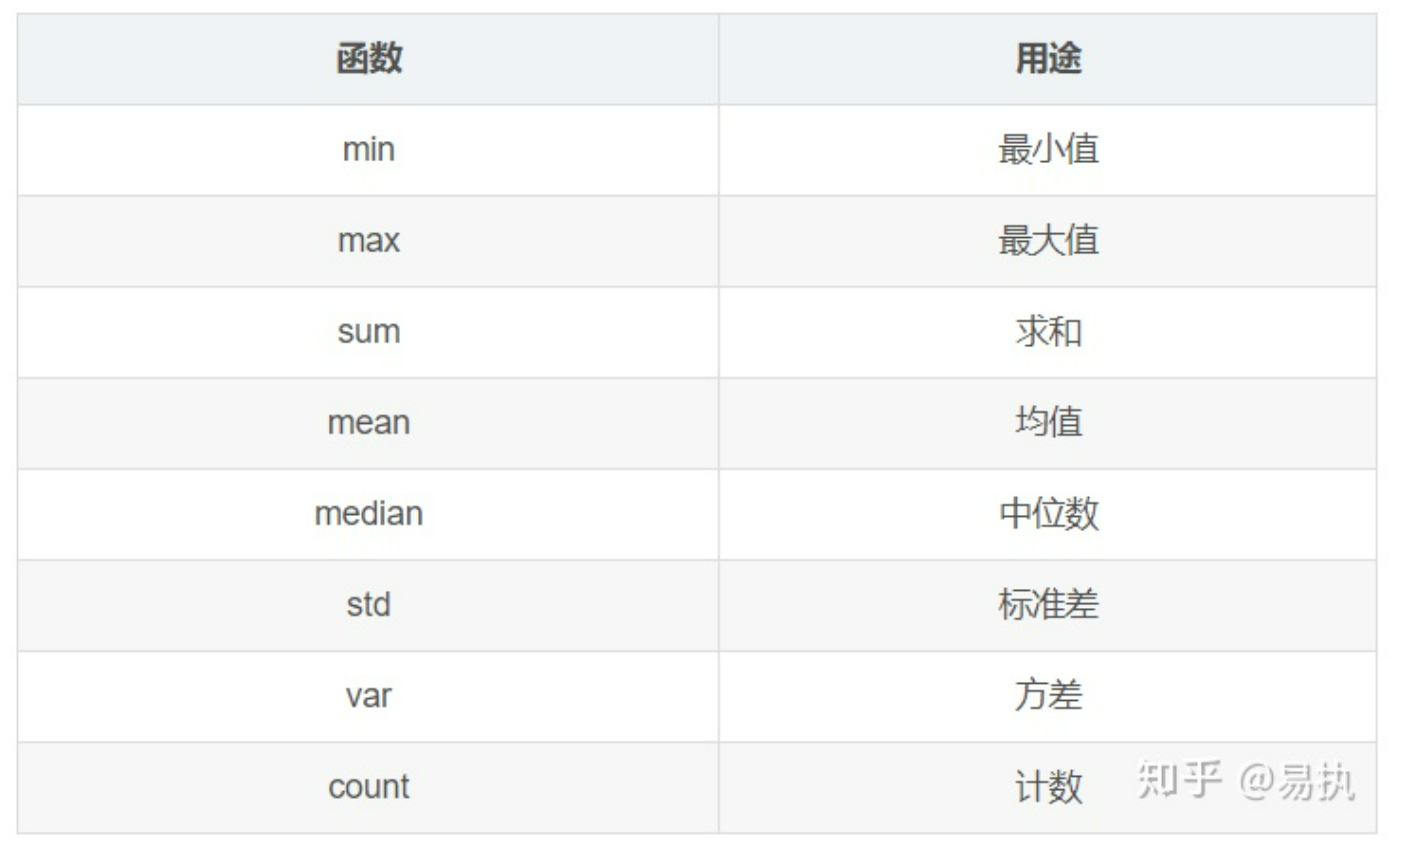
圖片參考 取自：https://zhuanlan.zhihu.com/p/101284491

In [16]:
# 用groupby 聚合
df10.groupby('company').agg('mean')

,salary,age
company,,
A,25.800000,28.200000
B,31.333333,32.666667
C,42.500000,34.000000


In [17]:
# 用groupby 聚合(不同條件)
df10.groupby('company').agg({'salary':'mean','age':'count'})

,salary,age
company,,
A,25.800000,5
B,31.333333,3
C,42.500000,2


In [18]:
# 用transform新增一個欄位data_avg，把每一組company(A、B、C)的salary平均值貼在DataFrame後面
df10['salary_avg'] = df10.groupby('company')['salary'].transform('mean')
df10

,company,salary,age,salary_avg
0,A,18,35,25.800000
1,B,41,25,31.333333
2,A,0,24,25.800000
3,C,46,33,42.500000
4,A,36,24,25.800000
5,B,43,35,31.333333
6,A,43,36,25.800000
7,A,32,22,25.800000
8,B,10,38,31.333333
9,C,39,35,42.500000


In [20]:
# 用groupby 聚合多個欄位
df10.groupby(['company','age']).agg({'salary':'mean','age':'count'})

salary  age
company age             
A       22     32.0    1
        24     18.0    2
        35     18.0    1
        36     43.0    1
B       25     41.0    1
        35     43.0    1
        38     10.0    1
C       33     46.0    1
        35     39.0    1